In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


DATA DESCRIPTION
```
file name -> Columns
quater-i.csv -> ['order_id', 'quantity', 'item_id', 'choice_description_id' 'item_price']
items.csv -> ['item_id', 'item_name']
```
Dataset Link - https://drive.google.com/drive/folders/1Z0kaFybvgFeczeUj4dldUnhTdloLqLsL?usp=share_link

In [3]:
# import like this
items_path = "/content/drive/MyDrive/Learn_DS_dataset/items_20.csv"
q1_path = "/content/drive/MyDrive/Learn_DS_dataset/quarter-1.csv"
q2_path = "/content/drive/MyDrive/Learn_DS_dataset/quarter-2.csv"
q3_path = "/content/drive/MyDrive/Learn_DS_dataset/quarter-3.csv"


q1= pd.read_csv(q1_path)
q2 = pd.read_csv(q2_path)
q3 = pd.read_csv(q3_path)

items = pd.read_csv(items_path)

###`Q:1-5`
1. You are given three quater files, your job is to append these three files and make a single dataframe.
2. Have a index as Q-1 Q-2 Q-3 for respective quater files in the dataframe
3. Your are given a file items.csv which has item_id and item_name. Find out most sold items in each quarter.
4. Find out items which has made most revenue in each quarter.
5. Find out avg order price of each quarter.

***Note: item_price is given as str with $ sign, in earlier task you have converted this to rupees, here too first convert item_price field in rupees.***

In [4]:
# code here
# i-ii)
q=pd.concat([q1,q2,q3],keys=['q1','q2','q3']).reset_index()

In [5]:
# items

In [6]:
# iii)
pd.merge(q,items, on='item_id', how='left').groupby(['level_0','item_name'])['quantity'].sum().reset_index().sort_values('quantity',ascending=False).drop_duplicates(subset=['level_0'])

,level_0,item_name,quantity
65,q2,Chicken Bowl,394
17,q1,Chicken Bowl,367


In [7]:
# iiv)
tmp_df=pd.merge(q,items, on='item_id', how='left')
tmp_df['Bill']=tmp_df.apply(lambda x : float(x['item_price'][1:])*x['quantity']*90,axis=1)
tmp_df.groupby(['level_0','item_name'])['Bill'].sum().sort_values(ascending=False).reset_index().drop_duplicates(subset=['level_0'])

,level_0,item_name,Bill
0,q2,Chicken Bowl,377302.5
1,q1,Chicken Bowl,346714.2


###`Q-6` From the IPL wala dataset you have to find the Purple cap holder each season.

*Note: Bowler with most no wickets in a season gets purple cap. If more than one bowler have same no of wickets in the season, one with least ecomnomy among them is purple cap holder.*

Bowler's Economy = runs-conceded per six balls

In [8]:
ipl = pd.read_csv('/content/drive/MyDrive/Learn_DS_dataset/IPL_Ball_by_Ball_2008_2022.csv')
ipl_deliveries = pd.read_csv('/content/drive/MyDrive/Learn_DS_dataset/ipl_deliveries.csv')
matches = pd.read_csv('/content/drive/MyDrive/Learn_DS_dataset/IPL_Matches_2008_2022.csv')
# ipl=ipl[ipl['Super Over']=='N']

In [9]:
wicket=['caught', 'caught and bowled', 'bowled', 'stumped','lbw',]
ipl['isWicketDelivery']=ipl['kind'].apply(lambda x : 1 if x in wicket else 0)
tmp_df= pd.merge(ipl, matches, on='ID',how='left')


In [10]:
tmp_df=tmp_df[['ID','Season','bowler','total_run','isWicketDelivery']]
tmp_df.groupby(['Season', 'bowler'])[['isWicketDelivery','total_run']].agg({

                                          'isWicketDelivery':'sum',
                                          'total_run': lambda x :x.sum()*6/ x.count()
                                      }).reset_index().sort_values(by=['Season','isWicketDelivery','total_run'], ascending=[True,False,True]).drop_duplicates(subset=['Season'])

,Season,bowler,isWicketDelivery,total_run
84,2007/08,Sohail Tanvir,22,6.226415
174,2009,RP Singh,23,6.753927
284,2009/10,PP Ojha,21,7.316667
447,2011,SL Malinga,28,5.939547
537,2012,M Morkel,25,7.187661
629,2013,DJ Bravo,32,7.729592
779,2014,MM Sharma,23,8.462963
847,2015,DJ Bravo,26,8.185185
938,2016,B Kumar,23,7.289855
1048,2017,B Kumar,26,7.111111


In [11]:
tmp_df.columns

Index(['ID', 'Season', 'bowler', 'total_run', 'isWicketDelivery'], dtype='object')

In [12]:
tmp_df

,ID,Season,bowler,total_run,isWicketDelivery
0,1312200,2022,Mohammed Shami,0,0
1,1312200,2022,Mohammed Shami,1,0
2,1312200,2022,Mohammed Shami,1,0
3,1312200,2022,Mohammed Shami,0,0
4,1312200,2022,Mohammed Shami,0,0
...,...,...,...,...,...
225949,335982,2007/08,I Sharma,1,0
225950,335982,2007/08,I Sharma,1,0
225951,335982,2007/08,I Sharma,0,0
225952,335982,2007/08,LR Shukla,1,0


In [13]:
# tmp_df

###`Q-7:` Best bowler in death overs.
*Note: Have taken most no of wickets in case of tie with least economy*

Death Overs - [16-20]

In [14]:
tmp_df= pd.merge(ipl, matches, on='ID',how='left')
tmp_df=tmp_df[tmp_df['overs']>15]

In [15]:
# code here
tmp_df=tmp_df[['ID','Season','bowler','total_run','isWicketDelivery']]
tmp_df.groupby(['Season', 'bowler'])[['isWicketDelivery','total_run']].agg({

                                          'isWicketDelivery':'sum',
                                          'total_run': lambda x :x.sum()*6/ x.count()
                                      }).reset_index().sort_values(by=['Season','isWicketDelivery','total_run'], ascending=[True,False,True]).drop_duplicates(subset=['Season'])

,Season,bowler,isWicketDelivery,total_run
63,2007/08,Sohail Tanvir,16,6.734694
135,2009,RP Singh,12,7.344000
228,2009/10,RJ Harris,8,11.205882
336,2011,SL Malinga,12,7.067797
425,2012,SP Narine,18,7.071429
458,2013,DJ Bravo,20,7.704142
567,2014,MM Sharma,14,10.588235
612,2015,DJ Bravo,21,8.795455
677,2016,B Kumar,11,9.681818
754,2017,B Kumar,16,8.028169


###`Q-8` Batsman record season wise

Make a function which takes a input `batsman_name` and it returns a dataframe.
Columns of the data frame are - `['Season','Innings', 'TotalRuns', 'Avg', 'HighestScore','StrikeRate']`.
* In result make `Season` column as index.

* Avg - total_runs/ no of time got out. - player_out column will help.
* StrikeRate -(total_runs/ balls faced) * 100- wides are not included in batsman ball faced counts. No balls are included. -> Extra_type column will help
* Batsman Can score runs on No Balls.
* Batsman can get out on No Ball or Wides. And even while being on non-striker. Keep these things in mind before masking.

In [16]:
tmp_df= pd.merge(ipl, matches, on='ID',how='left')

In [17]:
tmp_df= pd.merge(ipl, matches, on='ID',how='left')
tmp_df[tmp_df['WinningTeam']=='Royal Challengers Bangalore']

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,...,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
469,1312198,1,0,1,V Kohli,Mohsin Khan,F du Plessis,NaN,0,0,...,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
470,1312198,1,0,2,V Kohli,Mohsin Khan,F du Plessis,NaN,0,0,...,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
471,1312198,1,0,3,V Kohli,Mohsin Khan,F du Plessis,NaN,0,0,...,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
472,1312198,1,0,4,V Kohli,Mohsin Khan,F du Plessis,wides,0,1,...,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
473,1312198,1,0,5,V Kohli,Mohsin Khan,F du Plessis,NaN,3,0,...,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225257,335985,2,19,1,MV Boucher,DS Kulkarni,B Akhil,NaN,1,0,...,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
225258,335985,2,19,2,B Akhil,DS Kulkarni,MV Boucher,wides,0,1,...,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
225259,335985,2,19,3,B Akhil,DS Kulkarni,MV Boucher,NaN,0,0,...,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
225260,335985,2,19,4,B Akhil,DS Kulkarni,MV Boucher,NaN,0,0,...,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper


In [18]:
tmp_df= pd.merge(ipl, matches, on='ID',how='left')
tmp_df = tmp_df[['ID', 'innings', 'overs', 'ballnumber', 'batter', 'extra_type', 'batsman_run',
                 'extras_run', 'total_run', 'isWicketDelivery', 'player_out', 'kind','Date',
                 'Season','MatchNumber', 'Team1', 'Team2', ] ]
def batsman_history(name, tmp_df2):
  # print(name)
  # display(tmp_df)
  tmp_df2=tmp_df2[(tmp_df2['batter']==name )&( tmp_df2['extra_type']!='wides')]
  # display(tmp_df2)
  tmp_df3=tmp_df2.groupby('Season').agg({
      'batsman_run':['sum','count'],
      'player_out':lambda x: (x==name).sum(),
      # 'ID' : 'nunique'
  }).reset_index().set_index('Season')

  tmp_df3['Strike rate']=round((tmp_df3['batsman_run','sum']/tmp_df3['batsman_run','count'])*100, 2)

  # tmp_df3['Highest']=
  # display(tmp_df3)
  highest_run =tmp_df2.groupby(['Season', 'ID'])['batsman_run'].sum().sort_values(ascending=False).reset_index().drop_duplicates(subset=['Season']).drop(columns=['ID'])
  tmp_df3 = tmp_df3.droplevel(0,axis=1)
  final=pd.merge(tmp_df3, highest_run, on='Season')
  final.rename( columns = {
      'sum':'Total Run',
      'count':'Ball Faced',
      '<lambda>':'Innings',

      'batsman_run':'Heightest Run',
      '':'Strike Rate'
  }, inplace=True)
  final['Average ']=round((final['Total Run']/final['Innings']), 2)
  display(final.sort_values(by=['Season']))

  # innnings= tmp_df2['ID'].nunique()

batsman_history('V Kohli',tmp_df)
# tmp_df

,Season,Total Run,Ball Faced,Innings,Strike Rate,Heightest Run,Average
0,2007/08,165,157,11,105.10,38,15.00
1,2009,246,219,11,112.33,50,22.36
2,2009/10,307,212,11,144.81,58,27.91
3,2011,557,460,12,121.09,71,46.42
4,2012,364,326,12,111.66,73,30.33
5,2013,639,459,14,139.22,99,45.64
6,2014,359,294,13,122.11,73,27.62
7,2015,505,386,11,130.83,82,45.91
8,2016,973,640,12,152.03,113,81.08
9,2017,308,252,10,122.22,64,30.80


###`Q-9` Using both dataset, make a dataframe as described below

Data Frame columns-> `['PlayerOfThematch', 'BattingFigure', 'BowlingFigure']`

* BattingFigure->`<runs>/<balls>`
* BowlingFigure->`<wicket>/<runs-conceded>`

DataFrame should have one record for each match.

Say 'V Kohli' got POM award then in dataset include his batting figure of that match. Say he scored 112runs in 76 balls. And he hasn't bowled so Bowling Figure will be NaN
```
PlayerOfThematch BattingFigure BowlingFigure
V Kohli          112/76         nan  

```


In [19]:
# code here
tmp_df= pd.merge(ipl, matches, on='ID',how='left')
tmp_df = tmp_df[['ID', 'ballnumber', 'batter', 'bowler', 'extra_type', 'batsman_run', 'extras_run',
                 'total_run','isWicketDelivery', 'player_out', 'kind','Player_of_Match']]

# final_df = pd.merge(tmp_df, ipl_deliveries, on='ID',how='left')

In [20]:
# tmp_df

In [21]:
bat=tmp_df[(tmp_df['batter']==tmp_df['Player_of_Match']) | (tmp_df['bowler']==tmp_df['Player_of_Match'])]
wicket=['caught', 'caught and bowled', 'bowled', 'stumped','lbw',]
bat['isWicketDelivery']=bat['kind'].apply(lambda x : 1 if x in wicket else 0)
bat=bat.groupby(['ID'])
df_MOM= pd.DataFrame(columns=['name', 'batting figure', 'bowling figure'])


for group,data in bat:
  name=data['Player_of_Match'].unique()[0]
  run = data[data['batter']==name]['batsman_run'].sum()
  ball=data[(data['batter']==name) & (data['extra_type']!='wides') ].shape[0]

  wicket= data[data['bowler']==name]['isWicketDelivery'].sum()
  conced_run = data[data['bowler']==name]['total_run'].sum()

  batting_figure='nan' if run==0 and ball==0 else str(run)+'/'+str(ball)
  bowling_figure ='nan' if wicket==0 and conced_run==0 else str(conced_run)+'/'+str(wicket)

  row={
      'name':name,
      'batting figure': batting_figure,
      'bowling figure': bowling_figure
  }


  row_df = pd.DataFrame([row])
  df_MOM = pd.concat([df_MOM, row_df], ignore_index=True)

<ipython-input-21-6010d0b2753a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bat['isWicketDelivery']=bat['kind'].apply(lambda x : 1 if x in wicket else 0)


In [22]:
df_MOM[df_MOM['name']=='V Kohli']

,name,batting figure,bowling figure
203,V Kohli,56/38,nan
208,V Kohli,67/42,nan
340,V Kohli,65/50,nan
371,V Kohli,93/47,nan
391,V Kohli,56/29,nan
506,V Kohli,44/19,nan
532,V Kohli,100/63,nan
548,V Kohli,108/58,nan
561,V Kohli,75/51,nan
563,V Kohli,113/50,nan


## **Questions Based on Iris Dataset**

- **Sepal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **SepalLengthCm:** Sepal length of flowers in cm
    - **SepalWidthCm:** Sepal width of flowers in cm

- **Petal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **PetalLengthCm:** Petal length of flowers in cm
    - **PetalWidthCm:** Petal width of flowers in cm

- **Iris Virginica:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Versicolor:** https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Setosa:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv
    - **Unnamed 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

In [23]:
import pandas as pd
sepal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv")
petal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv")

virginica = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv")
versicolor = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv")
setosa = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv")


### `Q-9:` Plot a bar chart of the average Sepal Length  of Virginica and average Petal length of Setosa flower.

In [42]:
# code her
tmp=pd.merge((pd.merge(sepal_all, petal_all, on='Id').drop(columns=['Unnamed: 0_x','Unnamed: 0_y'])),pd.concat([setosa,virginica]).drop(columns='Unnamed: 0').set_index('Id'), on='Id').set_index('Id')

<Axes: xlabel='Species'>

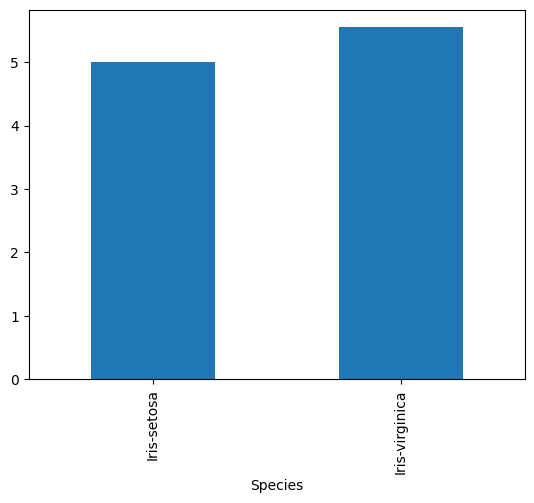

In [60]:
row1=tmp[tmp['Species']=='Iris-setosa'].groupby('Species')['SepalLengthCm'].mean()
row2=tmp[tmp['Species']=='Iris-virginica'].groupby('Species')['PetalLengthCm'].mean()
pd.concat([row1, row2]).plot(kind='bar')

### `Q-10:` Create the complete dataset by uisng the below datasets:
- virginica
- versicolor
- setosa
- sepal all
- petal all

This dataset should have these below column names in order:
1. Id
2. Species
3. SepalLengthCm
4. SepalWidthCm
5. PetalLengthCm
6. PetalWidthCm

Also, the dataset should be shuffled means the `Id` column should not be in increasing or decreasing order. So, make a dataset which has the shuffled Id column. You can use `DataFrame.sample()` method to shuffle.

In [63]:
# code here
# code her
pd.merge((pd.merge(sepal_all, petal_all, on='Id').drop(columns=['Unnamed: 0_x','Unnamed: 0_y'])),pd.concat([setosa,virginica,versicolor]).drop(columns='Unnamed: 0').set_index('Id'), on='Id').set_index('Id')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


### `Q-11:` Find out the maximum and minimum sepal width and petal width of Setosa and Versicolor. To do this:
- First create a dataset with merging the required datasets
- After that, use `groupby` to create groups based on the "Species" column.
- Then find out which are asked in this question.


The output should be like this:
```bash
Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4

**************************************************

Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4

**************************************************
```

In [78]:
# code here
tmp=pd.merge((pd.merge(sepal_all, petal_all, on='Id').drop(columns=['Unnamed: 0_x','Unnamed: 0_y'])),pd.concat([setosa,virginica,versicolor]).drop(columns='Unnamed: 0').set_index('Id'), on='Id').set_index('Id').groupby('Species')['SepalWidthCm'].agg(['max','min']).reset_index()

# display(tmp)
cnt=0
for index, row in tmp.iterrows():
  # display(row)
  if row['Species']=='Iris-virginica':
    continue
  else:
    if(cnt):
      print("\n")
    print("Minimum Sepal width of {} is {}".format(row['Species'], row['min']))
    print("Maximum Sepal width of {} is {}".format(row['Species'], row['max']))
    print("\n")
    print("********************************************************************")

    cnt+=1

Minimum Sepal width of Iris-setosa is 2.3
Maximum Sepal width of Iris-setosa is 4.4


********************************************************************


Minimum Sepal width of Iris-versicolor is 2.0
Maximum Sepal width of Iris-versicolor is 3.4


********************************************************************
